# Combined Data Preprocessing and PCA Analysis

This notebook combines the steps from data splitting, feature selection, and PCA analysis into a single workflow. The final step includes visualizing the PCA scatter plot to observe clustering trends among different cell classes.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Set random seed for reproducibility
np.random.seed(42)

In [2]:
# Step 1: Load and split the data
data_path = '/Users/mading1/QuantitativeBiology/cytodata_2019_orig_challenge_data/training_data.csv'
df = pd.read_csv(data_path)

# Exclude metadata and label columns
meta_cols = ['cell_code', 'cell_id', 'plate', 'replicate', 'well', 'field']
feature_cols = [col for col in df.columns if col not in meta_cols + ['target']]
X = df[feature_cols]
y = df['target']

# Split into training and testing sets
X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set shape: {X_train_raw.shape}")
print(f"Testing set shape: {X_test_raw.shape}")

Training set shape: (41013, 116)
Testing set shape: (10254, 116)


In [3]:
# Step 2: Feature selection (if applicable)
# For simplicity, we assume all features are used. Add feature selection logic here if needed.
selected_features = feature_cols  # Placeholder for selected features
X_train_selected = X_train_raw[selected_features]
X_test_selected = X_test_raw[selected_features]

In [4]:
# Step 3: Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)

print("Data standardization complete.")

Data standardization complete.


In [5]:
# Step 4: Perform PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print(f"Explained variance ratio: {pca.explained_variance_ratio_}")
print(f"Total variance explained: {sum(pca.explained_variance_ratio_):.2f}")

Explained variance ratio: [0.31870063 0.20164832]
Total variance explained: 0.52


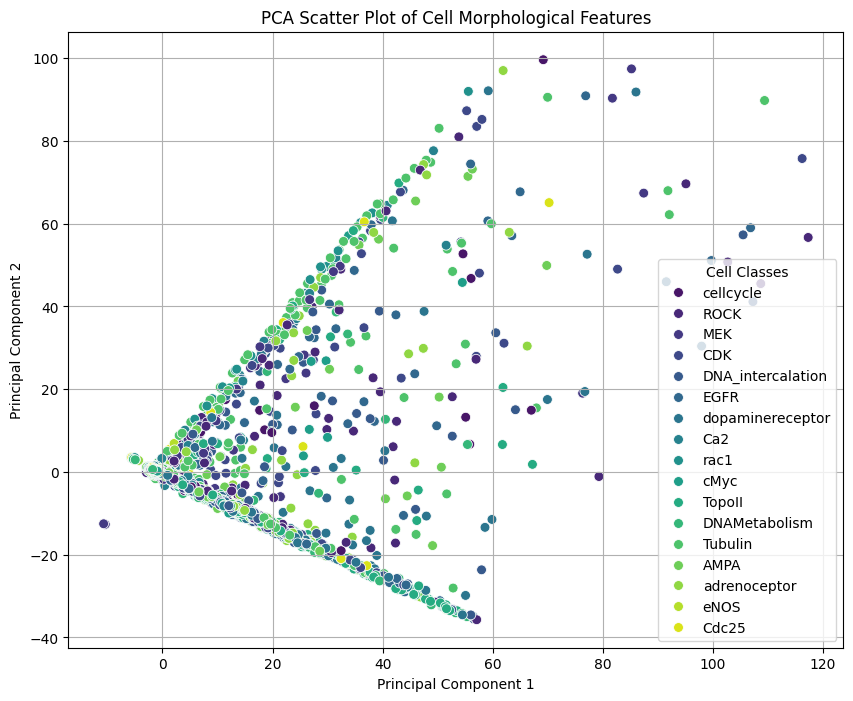

In [6]:
# Step 5: Visualize PCA scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], hue=y_train, palette='viridis', s=50)
plt.title('PCA Scatter Plot of Cell Morphological Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cell Classes')
plt.grid(True)
plt.show()

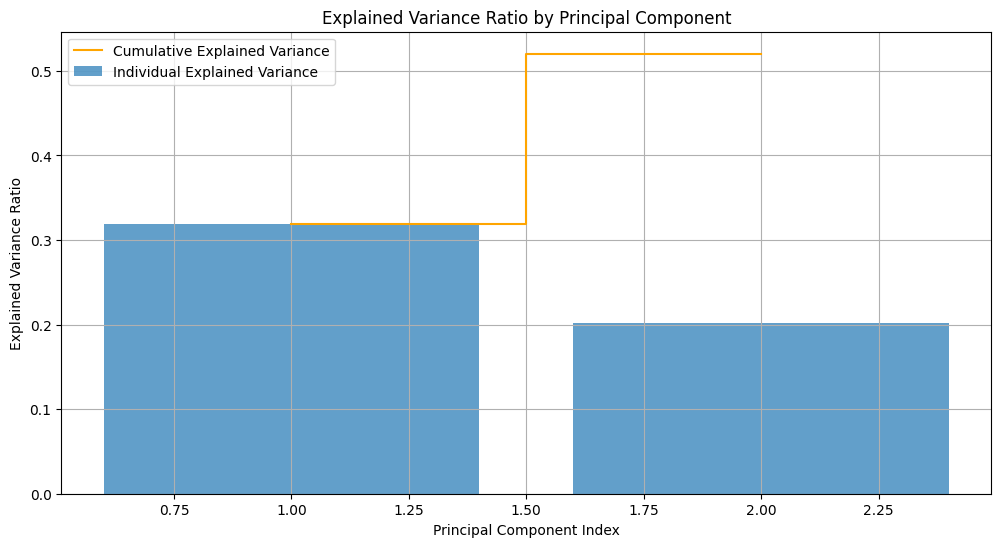

In [8]:
# Visualize explained variance ratio for each principal component
plt.figure(figsize=(12, 6))

# Bar plot for explained variance ratio
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, alpha=0.7, label='Individual Explained Variance')

# Line plot for cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid', label='Cumulative Explained Variance', color='orange')

plt.xlabel('Principal Component Index')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Component')
plt.legend(loc='best')
plt.grid(True)
plt.show()